## CCNSSS 2018 Module 2: Perceptual inference and motor control

#  Tutorial 1 : Signal Detection Theory & Drift Diffusion Modelling

*Please execute the cell bellow to initialize the notebook environment*

In [1]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import scipy as sp                 # import scipy
import scipy.stats
import math                        # import basic math functions
import random                      # import basic random number generator functions

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})
plt.style.use('ggplot')

!if [ ! -f ddm.py ]; then git clone https://github.com/ccnss/ccnss2018_students; \
                        cp -f ccnss2018_students/module2/1_signal_detection_theory_and_drift_diffusion_modelling/ddm.py ./; fi

---


## Objectives


In this notebook we'll look at *Signal Detection Theory (SDT)* and implement a *Drift diffusion model (DDM)* to simulate some data.

SDT:

- use random distributions in Python
- visualize data in Python
- practice $d'$ sensitivity analysis on mock data
- practice Receiver Operating Characteristic (ROC) analysis on mock data

DDM:


- What do reaction time distributions look like?
- How do distributions for correct and incorrect trials differ?
- How can these properties be understood in terms of the Drift Diffusion Model?
- simulate the Drift Diffusion Model

---



## Background (SDT)

Signal detection theory (SDT) is used when we want to measure the way we make decisions under conditions of uncertainty (for example: how well would we detect the presence of a car in front of us, while driving under foggy conditions). 

SDT assumes that the decision maker is not a passive receiver of information, but an active decision-maker who makes difficult perceptual judgments under conditions of uncertainty. 

Let's take an example: Imgine we are in foggy circumstances, and we are forced to decide whether there is an object in front of us based solely on visual stimulus (which is impaired by the fog). The density of the fog makes detecting a car in front of us more difficult (and is a function of your distance from the car and the fog density). 

Signal Detection Theory can be applied to a data set where stimuli is either present or absent (e.g. stim = car, or no_car), and the observer responds to each trial based on whether he/she detects the stimulus as 'present' or 'absent' (detect=car, or no_car). These tasks are also known as 2-Alternative Forced Choice tasks (2-AFC for short). In such tasks, the trials can be sorted into one of four categories:

![](https://github.com/ccnss/ccnss2018_students/raw/master/module2/1_signal_detection_theory_and_drift_diffusion_modelling/figures/2AFC_table.png)


Signal detection theory is a means to quantify the ability to differentiate between valid information (signal) and noise. Multiple measures can be extracted using SDT: 

* the $d'$ (pronoumced dee-prime): is a measure of sensitivity (how hard/easy is it to perceive a stimulus under uncertainty). 
            *How easy/hard is it to see a car under foggy conditions for each participant?*
* the bias (sometimes called 'threshold') '$c$': is a measure of bias in discriminating signal from noise. 
            *Does each participant have a tendency to overestimate or underestimate a car being present?*
* the Receiver Operating Characteristic curve (ROC): enables to illustrate the ability of a participant to discriminate between signal and noise as the threshold and/or uncertainty is varied. 
            *How does the participant ability to detect a car changes as a function of fog density*
            or
            *How does the participant ability to detect a car changes as a function of their threshold/bias*

___

Graphically, you may think of the signal and the noise are overlapping distributions (signal: red distribution, noise: blue distribution). The threshold (or bias) is a boundary that separates the signal from the noise and defines whether the participant responds 'present' or 'not present'. 

When the threshold is set very low, noise might inadvertently be classified as signal (i.e. many false positives (FP)). 

Conversely, when the threshold is set very high, signal might be classified as noise (many false negatives, FN)).

![](https://github.com/ccnss/ccnss2018_students/raw/master/module2/1_signal_detection_theory_and_drift_diffusion_modelling/figures/roc.png)

**Note:** SDT measures can also be used to study any kind of binary classifiers (say: how good is a routine test at detecting cancer). In this case, having a conservative bias (low threshold) would result in more false positive, but depending on the application it could be a good thing. For example, it is better to have a high false alarm rate for detecting cancer that would lead to a follow-up in a clinic, rather than missing true positive (cancer being present, and the test returning that it isn't).

For more info: [https://en.wikipedia.org/wiki/Receiver_operating_characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

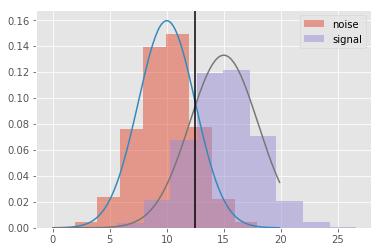

In [31]:
# initialize your random seed
random.seed(0)

# define your variables here
mu1, s1 = 15, 3
mu2, s2 = 10, 2.5
n_samples = 10000

# draw n_samples samples from a normal distribution with the correct parameters
noise =  np.random.randn(n_samples)*s2 + mu2
signal = np.random.randn(n_samples)*s1 + mu1

# plot a histogram of the noise distribution
plt.hist(noise, bins=10, alpha=0.5, label='noise', density=True)

# plot the true data-generating noise distribution using the correct parameters
x = np.arange(0, 20, 0.1)
#plt.plot(x, np.exp(-(x-mu2)/(s2**2)/s2*n_samples)
plt.plot(x, scipy.stats.norm.pdf(x, mu2, s2))

# plot the histogram of the signal distribution
plt.hist(signal, bins=10, alpha=0.5, label='signal', density=True)

# plot the true data-generating signal distribution using the correct parameters
plt.plot(x, scipy.stats.norm.pdf(x,mu1,s1))

# plot the decision criteria at point 12.5
#plt.plot([12.5, 12.5], [0, 1])
plt.axvline(12.5, c='k')
#import matplotlib
#matplotlib.axes.Axes.axvline(12.5)

# show the plot legend
plt.legend()

In [0]:
#insert code here

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module2/1_signal_detection_theory_and_drift_diffusion_modelling/figures/expected_ex1.png)

**EXERCISE 2: Sensitivity ($d'$) and specificity analysis.**

$d'$ is a dimensionless statistic. A higher d' indicates that the signal can be more readily detected.

The sensitivity index or $d'$ provides the separation between the means of the signal and the noise distributions, compared against the standard deviation of the signal or noise distribution. For normally distributed signal ($s$) and noise ($n$), with mean and standard deviations $\mu _{S}$ and $\sigma _{S}$ , and $\mu _{N}$ $\sigma _{N}$, respectively, $d'$ is defined as:

\begin{align*} d'=\frac {\mu _{S}-\mu _{N}}{\sqrt {{\frac {1}{2}}\left(\sigma _{S}^{2}+\sigma _{N}^{2}\right)}} \end{align*}

![](https://github.com/ccnss/ccnss2018_students/raw/master/module2/1_signal_detection_theory_and_drift_diffusion_modelling/figures/deeprime.png)


**Instructions**
* Set your seed to 0.
* Draw 100 samples from a normal distribution with mean '$\mu_1=10$', and standard deviation '$\sigma_1=2.5$'
* Draw 100 samples from another normal distribution with standard deviation '$\sigma_2=2.5$' with a different mean '$\mu_2$' (vary the mean '$\mu_2$' to 11, 13, and 15)
* For each value of the second mean '$\mu_2$', calculate the $d'$, using the samples you have for each distribution using the samples from each distribution. (hint: you may want to use np.mean, and np.std) 
* For each value of the second mean '$\mu_2$', calculate the $d'$, using the true mean and std of the distributions.  See how the d-prime changes as the mean of the two distributions get further apart.
* Change the decision threshold such that you have 5 threshold values interspersed linearly between the minimum of the noise distribution, up to the maximum of the signal distribution. (hint: use linspace)
* Print out the number of samples, threshold, estimated d_prime, true d_prime, and error 
* Calculate the Optimal threshold, Hit Rate, False Alarm rate, and bias '$c$' for each true decision-threshold and print it out. 
* Change the number of sample of each distribution from 100, 1000, and 10000. See how having more data leads to better estimates of $d'$. Particularly in real situations when we do not know the true underlying summary statistic (mean and standard deviation) of the noise and signal distributions, having more data will yield better estimates of $d'$. 

In [0]:
# initialize your random seed
random.seed(0)

# set your means and stds for each distribution
mu1, s = 10, 2.5

s2 = 2.5

# Set the number of samples you want to draw
n_values = [100, 1000, 10000]

for i_n in range(len(n_values))#fill code here

    n = n_values[i_n]
    for mu2 in [11, 13, 15]#fill code here
    
        # calculate the d-prime from your true distribution parameters
        dPrime = (mu1 - mu2)/np.sqrt(0.5*(s**2 + s2**2))
    
        # sample randomly from the noise and signal distributions
        noise = np.random.normal(mu2, s2, n_values)
        signal = np.random.normal(mu1, s1, n_values) 

        # estimate the mean of the noise distribution
        mu1_hat = np.mean(signal)
        # estimate the standard deviation of the noise distribution
        sd1_hat = np.std(signal)
    
        # estimate the mean of the signal distribution
        mu2_hat = np.mean(noise)
        # estimate the standard deviation of the signal distribution
        sd2_hat = np.std(noise)
    
        # Calculate the estimated d-prime from the samples that you have drawn
        dPrime_hat = (mu1_hat - mu2_hat)/np.sqrt(0.5*(sd1_hat**2 + s2_hat**2))
        
        # find the minimum and maximum of your samples
        data_min = np.min((np.min(noise), np.min(signal)))
        data_max = np.max((np.max(noise), np.max(signal)))

        # decision criterion z linearly spaced
        z_range = np.linspace(data_min, data_max, 5)

        # initialize your true and false positive rates 
        falsePositiveRate_samples = 
        truePositiveRate_samples =

        print('Num samples: ' + str(n) + ', mu2: ' + str(mu2) 
              + ', Estimated dprime: ' + str(round(dPrime_hat,2)) 
              + ', True dprime: ' + str(round(dPrime,2)) + ', error: ' 
              + str(round(dPrime-dPrime_hat,3))  )
        
        for idx in range(len(z_range)):

            # Calculate the mean false positive rate from your samples
            falsePositiveRate_samples[idx] = np.sum(noise > z_range[idx])/len(noise)
            
            # Calculate the mean true positive rate from your samples
            truePositiveRate_samples[idx] = 
        
            print('True Threshold: ' + str(round(z_range[idx],2)) 
                  + ', Optimal threshold: ' + str((mu1+((mu2-mu1)/2))) 
                  + ', bias c: ' + str(round(z_range[idx]-(mu1+((mu2-mu1)/2)),2)))
        print(' ')
    print('----')

**EXPECTED OUTPUT**

```
Num samples: 100, mu2: 11, Estimated dprime: 0.34, True dprime: 0.63, error: 0.288
True Threshold: 4.25, Optimal threshold: 10.5, bias c: -6.25
True Threshold: 7.34, Optimal threshold: 10.5, bias c: -3.16
True Threshold: 10.42, Optimal threshold: 10.5, bias c: -0.08
True Threshold: 13.51, Optimal threshold: 10.5, bias c: 3.01
True Threshold: 16.59, Optimal threshold: 10.5, bias c: 6.09
...
```

**EXERCISE 3**

In statistics, a receiver operating characteristic curve, i.e. ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as the fall-out or probability of false alarm.

ROC analysis provides tools to select possibly optimal models and to discard suboptimal ones independently from (and prior to specifying) the cost context or the class distribution. ROC analysis is related in a direct and natural way to cost/benefit analysis of diagnostic decision making.

You can calculate the true False Alarm Rate and the Hit Rate can be calculated from the true parameters of the distributions. It is calculated as:

\begin{align*} True Positive Rate = Z(threshold \mid \mu_{signal} , \sigma_{signal}) \end{align*}
\begin{align*} False Positive Rate = Z(threshold \mid \mu_{noise} , \sigma_{noise}) \end{align*}

where function $Z(p)$, $p \in \left[0,1\right]$, is the inverse of the cumulative distribution function of the Gaussian distribution (you can use the function scipy.stats.norm.sf to do this)

**Instructions**
* Set your seed to 0
* Draw 100 samples from a normal distribution with mean '$\mu_1=10$', and standard deviation '$\sigma_1=2.5$'
* Draw 100 samples from another normal distribution with standard deviation '$\sigma_2=2.5$' with a different mean '$\mu_2$' (vary the mean '$\mu_2$' from 11 to 19 in steps of 2
* For each value of the second mean '$\mu_2$', calculate the ROC curve for varying decision criterion (take 50 linearly spaced values between the minimum and maximum values of your samples), and plot all ROC values on the same plot (i.e. for each decision threshold, plot the True and False positive rate).
* For each value of '$\mu_2$', also calculate the ROC curve based on the normal pdf (instead of samples from the pdf) and plot as lines (hint you may use scipy.stats.norm.cdf, scipy.stats.norm.sf). 
* Increase the number of sample of each distribution for 100, 500, and 1000. Look at how having more data changes the estimates.
* For each value of '$\mu_2$', calculate the sensitivity index d' using the true parameters of each distribution.
* Add axes labels, title and legends.

In [0]:
# initialize your random seed

# set your means and stds for each distribution
mu1, s = 10, 2.5

# Set the number of samples you want to draw
n_values = 

for i_n in # fill code here
    plt.figure();
    n = n_values[i_n]
    for mu2 in # fill code here
    
        # calculate the d-prime from your true distribution parameters
        dPrime = 
    
        # sample randomly from the noise and signal distributions
        noise =  
        signal =    

        # find the minimum and maximum of your samples
        data_min = 
        data_max = 

        # decision criterion z linearly spaced
        z_range = 

        # initialize your true and false positive rates 
        falsePositiveRate_samples = 
        truePositiveRate_samples =

        # initialize your true and false positive rates 
        falsePositiveRate_distr = 
        truePositiveRate_distr = 
    
        for idx in range(len(z_range)):

            # Calculate the mean false positive rate from your samples
            falsePositiveRate_samples[idx] = 
            
            # Calculate the mean true positive rate from your samples
            truePositiveRate_samples[idx] = 
        
            # Calculate the False positive rate from the true distribution
            falsePositiveRate_distr[idx] = 
            
            # Calculate the True positive rate from the true distribution
            truePositiveRate_distr[idx] = 

        #Plot here the ROC curve calculated from the true distribution parameters (using CDF or SF)

        #Plot here the data points of the ROC curve calculated for different threshold values
        
    plt.legend(loc='lower right')
    plt.xlim(0,1,)
    plt.ylim(0,1)
    plt.title('ROC curves, n=' + str(n))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plt.show()

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module2/1_signal_detection_theory_and_drift_diffusion_modelling/figures/expected_ex3_1.png)

# Part 2: Drift Diffusion Model (DDM)

As you saw in the lecture earlier today, DDMs predict both RT and choice accuracy data and have been used to model behavior in this sort of sequential discimination task.

** Short summary of the Drift diffusion model **

The Drift Diffusion Model arises from the Sequential Probability Ratio Test in the limit where discretely presented evidence becomes continuously presented evidence. 

Let's take an example. Say a participant is shown a blurry stimulus that is either a face or a house, and the participant needs to respond either 'face' or 'house' (2-AFC). Once a stimulus is displayed, the participant accumulates information over time by looking at the stimulus (the longer the participant looks at the stimulus, the more confident he/she will be that it is either a house or a face). The information accumulated with a drift-rate '$\mu$', and when the participant trace hits a decision-boundary '$-B$' or '$B$', the participant responds 'house' or 'face' respectively. We can change the bias of a given participant '$z$', by changing the starting point of the accumulation trace with respect to the decision boundaries '$-B$' or '$B$'. If we move '$z$' to be closer to '$-B$' than to '$B$', then the participant will be more likely to respond 'face' (i.e. a bias in responding for faces).

![](https://github.com/ccnss/ccnss2018_students/raw/master/module2/1_signal_detection_theory_and_drift_diffusion_modelling/figures/DDM.png)

In discrete time, you can think of the DDM as accumulating evidence using the following form:

\begin{eqnarray}
x[t] = x[t-1] + \mathcal{N}(\mu, \sigma),
\end{eqnarray}

where
$\mu$ : Drift rate, 
$\sigma$ : Noise standard deviation, 
and $t$ is the time point in ms.

Now consider two absorbing boundaries at $\pm B$. A decision is committed once the decision variable reaches one of the boundaries. In other words, the decision variable is "absorbed" by the boundary.

**References**

Ratcliff, Roger. "A theory of memory retrieval." Psychological review 85.2 (1978): 59.

Bogacz, Rafal, et al. "The physics of optimal decision making: a formal analysis of models of performance in two-alternative forced-choice tasks." Psychological review 113.4 (2006): 700.

**In this exercise** we'll write a function that simulates RTs and choices using a DDM with constant decision boundaries. We will plot this data, using the function written below, and in doing so, we will begin to see how the model generates behavior. 

In particular, we will play with some of the parameters of the DDM and look at the effects this has on the simulated data. We will simulate the DDM for traces up to 2500 ms.

Next, you can play with the parameters of the DDM and see how this affects the simulated behavior. 

** EXERCISE 4: Constant bound DDM simulation **

*** Instructions ***
* Complete the function `sim_DDM_constant`. The function simulates one trial of the DDM. The function should take parameters $\mu$, $\sigma$, and a boundary $B$ as inputs and return the trace of x, the timing of x, the choice (let's assume the choice here is either 'left' or 'right', and correctness (let's assume 'left' is the correct answer here), and the final reaction time of the decision.
* Plot the decision variable trajectories for 200 trials in the same figure with the following parameters: $\mu=1.5 \cdot 10^{-3}$, $\sigma=0.05$, $B=1$, use as the seed for each trial the index of the simulated trace (e.g. set seed=i_trial).
* (Optional) Change the parameters $\mu, \sigma$, and observe the change in the decision variable density.
* (Optional) Change the starting point, so that you get a bias away or closer to the correct boundary decision

*Hints*

- Adjust the alpha value of a plot to show more trajectories (use an alpha=0.1)

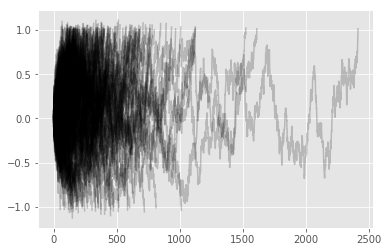

In [40]:
# insert your code here as functions for your simulated Drift Diffusion Model

def sim_DDM_constant(mu, sigma, B, seed=1):
    """
    Function that simulates one trial of the DDM
    
    Parameters
    ----------
    mu: float
        DDM drift rate
    sigma: float
        DDM standard-deviation
    B: float
        DDM boundary
    seed: integer, optional
        random seed
    
    Returns
    -------
    choice: categorical
        indicates whether left or right boundary was reached by decision variable
    correct: bool
        whether or not the left boundary (which is assumed to be the target boundary) was chosen
    rt: float
        reaction time in msec
    dvTrace: list
        trace of decision variable
    tTrace: list
        times at which decision variable was sampled in the simulation
        
    """
    
    
    # Set random seed
    np.random.seed(seed)
    
    # Initialize decision variable x
    x = 0
    
    # Initialize time of Trace 'tTrace', and value of trace 'dvTrace'
    tTrace = []
    dvTrace = []
    
    # Looping through time
    for t in range(2500):
        x = x + np.random.normal(mu, sigma, 1)[0]#calculate new value of trace at new time point
        
        # save time point t in 'tTrace'
        tTrace.append(t)
        
        # save value x in 'dvTrace'
        dvTrace.append(x)

        # check boundary conditions
        if x > B:
            rt = t
            choice = 'left'
            correct = True
            break
            #stop trial
            
        if x < -B:
            rt = t
            choice = 'right'
            correct = False
            break
            #stop trial
            
    else: # executed if no break has occurred in the for loop
        # If no boundary is hit before maximum time, 
        # choose according to decision variable value
        rt = t
        choice = 'left' if x > 0 else 'right'
        correct = True if choice == 'left' else False
    
    return choice, correct, rt, dvTrace, tTrace

mu = 1.5*0.001
sigma = 0.05
B = 1
choice, correct, rt, dvTrace, tTrace = sim_DDM_constant(mu, sigma, B)
for i in range(200):
    choice, correct, rt, dvTrace, tTrace = sim_DDM_constant(mu, sigma, B, i)
    plt.plot(tTrace, dvTrace, alpha=0.2, c = 'black')
plt.show()

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module2/1_signal_detection_theory_and_drift_diffusion_modelling/figures/expected_ex4.png)

*** EXERCISE 5: Reaction time distribution***

Given a set of parameters $\mu$, $\sigma$, $B$, we can simulate the DDM and recover the reaction time distributions for each boundary.

*** Instructions ***
* Set your random seed to 0
* Simulate the DDM for 5000 trials with $\mu=0.0015, \sigma=0.05, B=1$.
* Plot the reaction time distribution, separating correct from error trials (use the function provided below)

In [44]:
def  plot_rt_distribution (rt1, rt0, bins=None):
    '''
    # Function that takes RT data as input and plots a histogram

    rt1/rt0 : array of reaction time for correct/error trials
    bins: if given, the bins for plotting
    '''
    if bins is None:
        maxrt = max((max(rt1),max(rt0)))
        bins = np.linspace(0,maxrt,50)
    count1, bins_edge = np.histogram(rt1, bins=bins)
    count0, bins_edge = np.histogram(rt0, bins=bins)
    n_rt = len(rt0) + len(rt1)
    
    plt.figure()
    plt.bar(bins_edge[:-1], count1/n_rt, np.diff(bins_edge), color='blue', edgecolor='white')
    plt.bar(bins_edge[:-1], -count0/n_rt, np.diff(bins_edge), color='red', edgecolor='white')
    
    titletxt = 'Prop. correct {:0.2f}, '.format(sum(count1)/n_rt)
    titletxt += 'Mean RT {:0.0f}/{:0.0f} ms'.format(np.mean(rt1),np.mean(rt0))
    
    plt.ylabel('Proportion')
    plt.xlabel('Reaction Time')
    plt.title(titletxt)
    plt.xlim((bins.min(),bins.max()))
    
    plt.show()

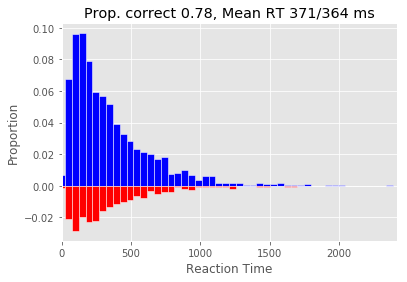

In [46]:
#insert your code here
rt1 = []
rt0 = []
for i in range(2000):
    choice, correct, rt, dvTrace, tTrace = sim_DDM_constant(mu, sigma, B, i)
    if correct:
        rt1.append(rt)
    else:
        rt0.append(rt)
        
plot_rt_distribution (np.array(rt1), np.array(rt0))

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module2/1_signal_detection_theory_and_drift_diffusion_modelling/figures/expected_ex5.png)

#(BONUS)
*** EXERCISE 6: Analytical solution of classical DDM ***

Another way of recovering the distribution of the RT for each boundary given the parameters of the DDM is to use the analytical solution. We provide some code in the src folder that calculates the analytical solution to the DDM so that we can plot the underlying RT distribution at each boundary (you don't need to worry about the inner working of the analytical solution right now, just how to use it).

*** Instructions ***

* import the function 'analytic_ddm' from the ddm.py module in the current directory.
* look at the docstring of the function to see what parameters it takes and what it returns (in the notebook you can append '?' to the function name)

In [0]:
from ddm import analytic_ddm

#insert code here

analytic_ddm?

# (BONUS)
***EXERCISE 7: Comparison between analytic and simulated solution***

*** Instructions ***

* Compare the analytical solution with simulation results (use 10,000 trials): $\mu=1e-3, \sigma=0.05, B=1$.
* Compare the time taken by the simulation and analytical calculation.

*Hints*

- When comparing analytical and simulated RT histograms, make sure the normalizations of the histograms are consistent
- Useful function: time.time()

In [0]:
#insert code here

**EXPECTED OUTPUT**

![](https://github.com/ccnss/ccnss2018_students/raw/master/module2/1_signal_detection_theory_and_drift_diffusion_modelling/figures/expected_ex7.png)